## Chapter 5 - Conceptual

1. From (5.6)  
\begin{align}
f_{\alpha} &= Var(\alpha X + (1-\alpha)Y) \\
&= Var(\alpha X) + Var((1-\alpha)Y) + 2Cov(\alpha X,(1-\alpha)Y) \\
&= \alpha^2 \sigma_X^2 + \sigma_Y^2 + \alpha^2\sigma_Y^2 - 2\alpha\sigma_Y^2 + (2\alpha -2\alpha^2)\sigma_{XY} \\ 
\end{align}  
Taking the derivative with respect to $\alpha$:  
\begin{align}
\frac {\partial f} {\partial \alpha} &= 2\alpha\sigma_X^2 + 2\alpha\sigma_Y^2 - 2\sigma_Y^2 + 2\sigma_{XY} - 4\alpha \sigma_{XY} \\
0 &= 2\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - 2\sigma_Y^2 + 2\sigma_{XY} \\
0 &= \alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - \sigma_Y^2 + \sigma_{XY} \\
\alpha &= \frac {2\sigma_Y^2 - \sigma_{XY}} {\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}
\end{align}  

2. Suppose we obtain a bootstrap sample from n observations.  
(a) The probability of the first bootstrap obs is NOT the jth obs = (n-1)/n.  
(b) The probability of the second bootstrap obs is NOT the jth obs = (n-1)/n.  
(c) Since we are taking n samples from our original sample with replacement, the probability of any jth 
obs is NOT in the bootstrap sample is $[(n-1)/n]^n$ or $(1 - 1/n)^n$ by multiplication rule.  
(d) When n = 5, there is a $1 - (1 - 1/5)^5 = 0.672$ probability that the jth obs is in bootstrap sample.  
(e) When n = 100, there is a $1 - (1 - 1/100)^100 = 0.634$ probability that the jth obs is in bootstrap sample.  
(f) When n = 10000, there is a $1 - (1 - 1/10000)^10000 = 0.6321$ probability that the jth obs is in bootstrap sample.  
(g) Plot 

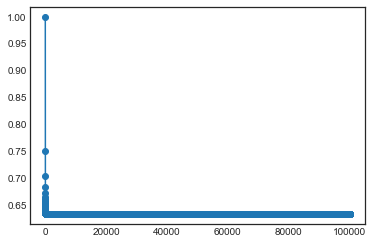

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
plt.style.use('seaborn-white')

x = np.arange(1, 100001)
y = 1 - (1 - 1/x)**x

plt.plot(x, y, marker='o')
plt.show()

It converts very quickly to about 0.63. Thus, with a 100 samples, we always get jth obs 0.63 of a time

(h) Numerically with n=100

In [7]:
store = []
a = np.arange(1, 101)
i = 1
while i < 10001:
    x = random.choices(a, k = 100)
    store.append(True if 4 in x else False)
    i += 1
np.mean(store)

0.6308

True to the formula above, we get 4 at around 0.632 of the time with n = 100. 

3. K folds cross-validation:  
(a). First, we shuffle and split data into K parts, lets say K = n. We use $K_i$ as a 
test set and remaining sets as training. We fit model, test on $K_i$ and record the score. Repeat 
for n times to get an average test score error (standard error).  
(b). Compare to validation set approach: 
    1. k-folds use more data to train the model. 
    2. validation set can gives wildly different test error based on chance (since we split data randomly).
    3. point 2 leads to overestimate the test error.
    4. However, validation set approach is much simpler to implement/understand and less computational.  
Compare to LOOCV:
        1. MUCH less computational heavy (unless using LOOCV formula which only works for specific cases)
        2. LOOCV has a higher variance but lower bias than k-folds.
  

4. Lets use 10-folds approach as an example. We perform these steps:  
    1. Split data randomly into 10 sets. Keep one as test, remaining as train.
    2. Fit the statistical model and record the coefficients. Discard model
    3. Repeat step 2 for other n-1 sets. 
    4. Find the standard deviation of the stored list of coefficients. This test error can be
    MSE or percentage.
    